Creates individual json files that are read by Gretel  
-> RUN IN EEG_3 ENVIRONMENT

In [1]:
from EEG_utils.EEG_utils_Siena import *

In [2]:
root_folder = "C:\\Users\\zanno\\physionet.org\\files\\siena-scalp-eeg\\1.0.0\\"

# Avoid PN00-3 (crisis ends after the end of the record...)

patient_id = "PN14"
record_id = "4"

num_points = 500
num_node_features = 3

Extracting data...
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\siena-scalp-eeg\1.0.0\PN14\PN14-4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:158: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:158: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:158: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 7.0, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


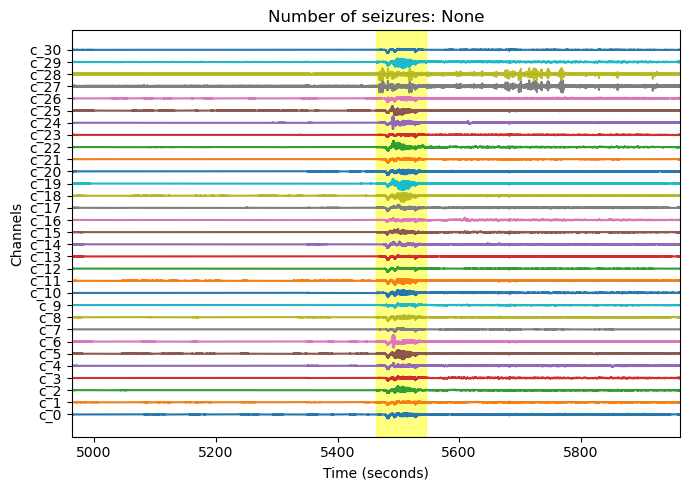

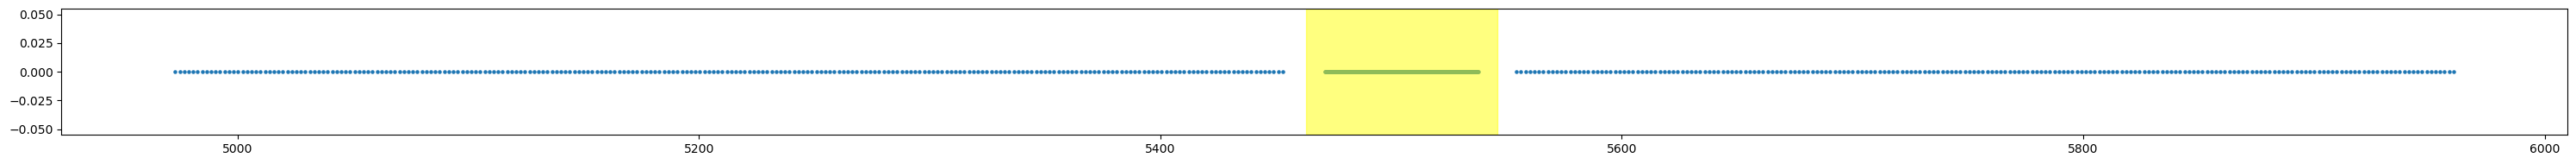

Creating graphs...
0.6081455647115509
k: 5120 ---> t: 4973.0 (seizure class: 0)
0.5676281271781393
k: 6115 ---> t: 4974.943359375 (seizure class: 0)
0.5772460967340167
k: 7110 ---> t: 4976.88671875 (seizure class: 0)
0.4724260002551381
k: 8105 ---> t: 4978.830078125 (seizure class: 0)
0.5340584249822324
k: 9100 ---> t: 4980.7734375 (seizure class: 0)
0.6184638978346784
k: 10095 ---> t: 4982.716796875 (seizure class: 0)
0.6085234331295463
k: 11090 ---> t: 4984.66015625 (seizure class: 0)
0.4944511120127358
k: 12085 ---> t: 4986.603515625 (seizure class: 0)
0.46969994561430073
k: 13080 ---> t: 4988.546875 (seizure class: 0)
0.4616670977840927
k: 14075 ---> t: 4990.490234375 (seizure class: 0)
0.43691406597667787
k: 15070 ---> t: 4992.43359375 (seizure class: 0)
0.3931971757896321
k: 16065 ---> t: 4994.376953125 (seizure class: 0)
0.4232282483101983
k: 17060 ---> t: 4996.3203125 (seizure class: 0)
0.4328739884033516
k: 18055 ---> t: 4998.263671875 (seizure class: 0)
0.4717463235708532
k: 

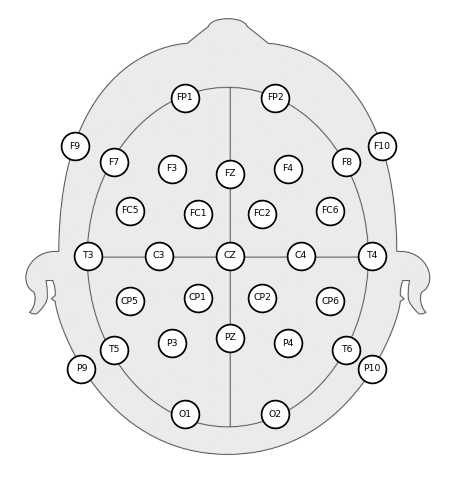

In [3]:
# Create patient
patient = Patient(FilePatient(root_folder, patient_id, record_id), num_points=num_points, num_node_features=num_node_features)

# Extract data
print('Extracting data...')
patient.extract_seizure_info()      # Extracting seizure information
patient.load_data()                 # Loading EEG data
patient.plot_signals()              # Plotting the signals with seizures highlighted

# Compute indices
patient.compute_indices()           # Performing sliding window correlation
patient.plot_indices()              # I can also do patient.plot_indices(xlim=(600,900))

# Create graph
print('Creating graphs...')
export_data_to_GRETEL(patient)      # Create graphs for GRETEL

print('Calculating nodes\' coordinates...')
export_coordinates(patient)         # Export coordinates

# __________________________________________________________________________

In [4]:
import datetime

now = datetime.datetime.now()
print("Last full run:", now.strftime("%d/%m/%Y, ore %H:%M"))

Last full run: 28/03/2025, ore 17:58


In [5]:
import winsound

winsound.Beep(440, 500)
winsound.Beep(400, 500)
winsound.Beep(440, 500)